In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# File paths for the datasets
file_paths = {
    "men": "data/Major Occupational Groups/Ba1047-1060.xls",
    "women": "data/Major Occupational Groups/Ba1061-1074.xls",
}

# Sheet names corresponding to each year
sheet_names = {
    "men": "Ba1047-1060",
    "women": "Ba1061-1074",
}

In [82]:
# Read the data from the Excel files
df_men = pd.read_excel(file_paths["men"], sheet_name=sheet_names["men"]).fillna(0)
df_women = pd.read_excel(file_paths["women"], sheet_name=sheet_names["women"]).fillna(0)

# Rename the columns for both datasets to ensure they're the same
columns_mapping = [
    'Year',
    'Total',
    'Professionals',
    'Farmers',
    'Proprietors',
    'Managers and Officials',
    'Clerical Workers',
    'Sales Workers',
    'Craft Workers',
    'Operatives',
    'Domestic Service Workers',
    'Other Service Workers',
    'Farm Laborers',
    'Laborers',
    'Unclassified'
]

# Rename the columns for men dataset and drop Total
df_men.columns = columns_mapping

# Rename the columns for women dataset and drop Total
df_women.columns = columns_mapping

# Set the 'Year' column as the index for both datasets
df_men.set_index('Year', inplace=True)
df_women.set_index('Year', inplace=True)

# create a row with 0s in the womens column for 1850
df_women.loc[1850] = (len(columns_mapping)-1)*[0]
df_women = df_women.sort_index()  

# Drop Total column from both datasets
df_women.drop('Total', axis=1, inplace=True)
df_men.drop('Total', axis=1, inplace=True)

all_years = sorted(df_men.index.union(df_women.index))

In [83]:
print(df_men.sum(axis=1))  # Total for men by year (should match 'Total')
print(df_women.sum(axis=1))  # Total for women by year (should match 'Total')

Year
1850     5227198.0
1860     7130935.0
1870    10225890.0
1880    13999048.0
1900    22388264.0
1910    28691820.0
1920    31921604.0
1940    35888499.0
1950    41099339.0
1960    42913576.0
1970    47280979.0
1980    55747832.0
1990    62109921.0
dtype: float64
Year
1850           0.0
1860     1029817.0
1870     1778348.0
1880     2479869.0
1900     5165820.0
1910     7544183.0
1920     8191670.0
1940    11695739.0
1950    15874410.0
1960    20957019.0
1970    28989537.0
1980    41630576.0
1990    52973172.0
dtype: float64


In [84]:
print(df_men.loc[1990])
print(df_women.loc[1990])

Professionals               11372403.0
Farmers                       896928.0
Proprietors                  1652516.0
Managers and Officials       7658588.0
Clerical Workers             4811482.0
Sales Workers                4293790.0
Craft Workers               11113939.0
Operatives                   9252218.0
Domestic Service Workers       25366.0
Other Service Workers        6241551.0
Farm Laborers                 600122.0
Laborers                     4191018.0
Unclassified                       0.0
Name: 1990, dtype: float64
Professionals               12189463.0
Farmers                       143307.0
Proprietors                   476305.0
Managers and Officials       4877586.0
Clerical Workers            16749025.0
Sales Workers                3577093.0
Craft Workers                 948145.0
Operatives                   4121174.0
Domestic Service Workers      496473.0
Other Service Workers        8482912.0
Farm Laborers                 170914.0
Laborers                      740775.

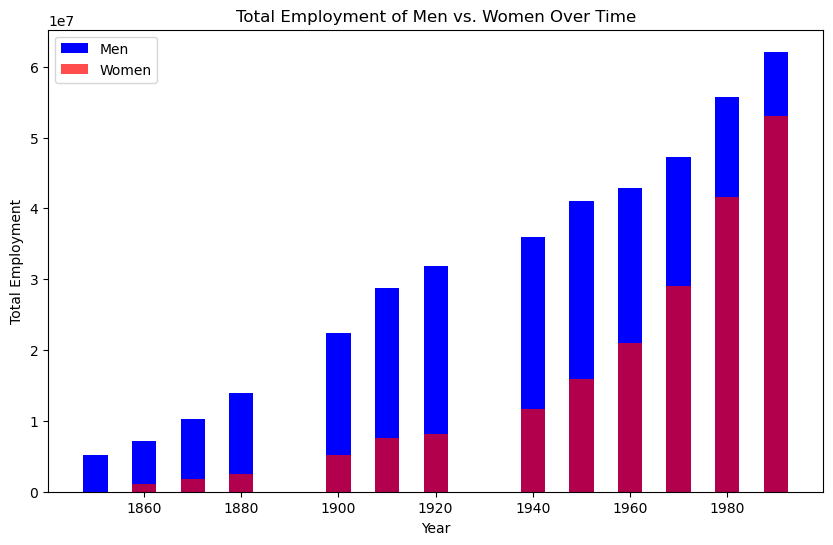

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(all_years, df_men.sum(axis=1), 5, label="Men", color="blue")
ax.bar(all_years, df_women.sum(axis=1), 5, label="Women", color="red", alpha=0.7)
ax.set_xlabel("Year")
ax.set_ylabel("Total Employment")
ax.set_title("Total Employment of Men vs. Women Over Time")
ax.legend()
plt.show()

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_7112/636897188.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(df_women.columns))  # Generates a color map with enough colors


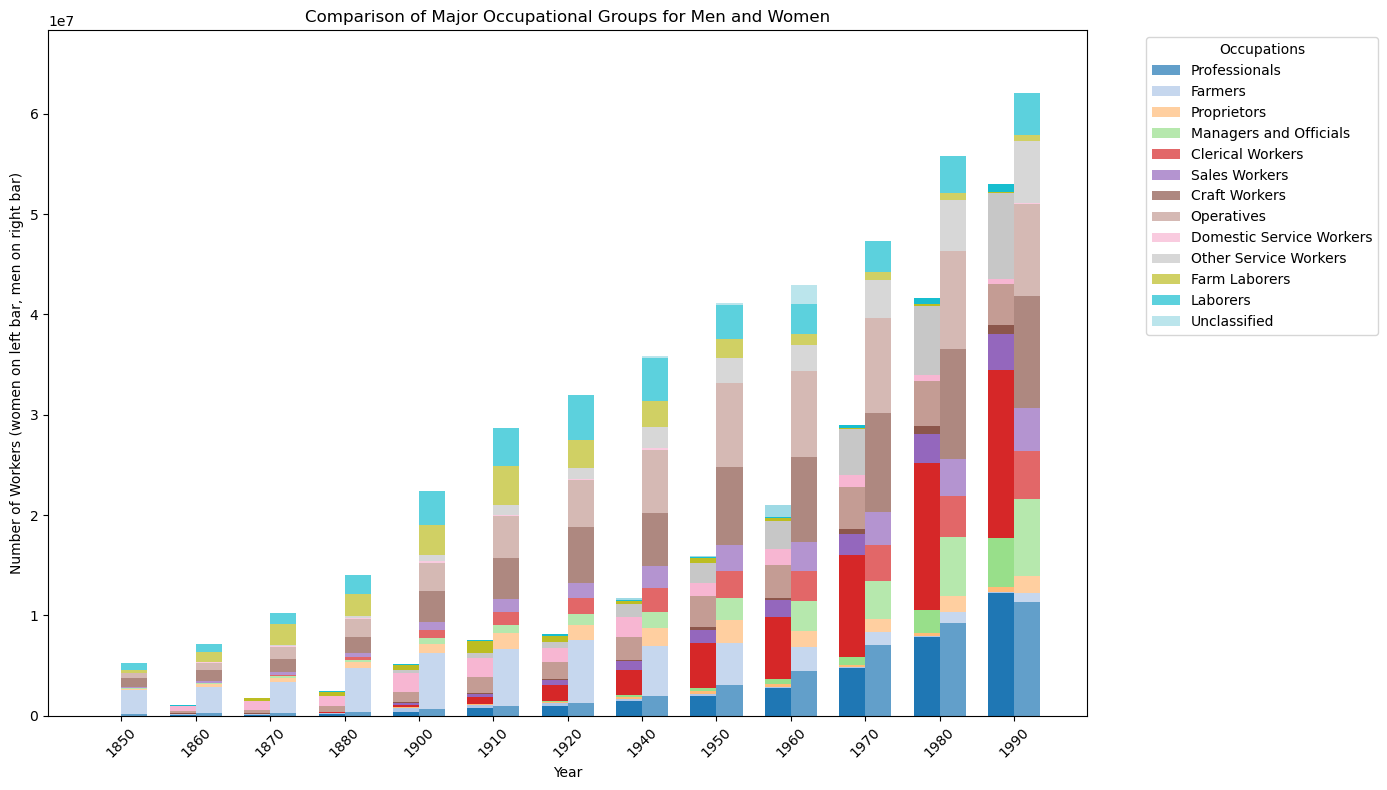

In [91]:
# Set up the figure and axis for the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis (aligned with the year data)
index = range(len(df_women))

# Generate enough colors for the number of occupations
colors = plt.cm.get_cmap('tab20', len(df_women.columns))  # Generates a color map with enough colors

women_cumulative = [0] * len(df_women)
men_cumulative = [0] * len(df_men)

for i, occupation in enumerate(columns_mapping[2:]):  # Skip 'Year' and 'Total'
    # Stacked bars for women
    ax.bar([x - bar_width / 2 for x in index], df_women[occupation], bar_width, 
           bottom=women_cumulative, color=colors(i))
    women_cumulative = [w + v for w, v in zip(women_cumulative, df_women[occupation])]

    # Stacked bars for men
    ax.bar([x + bar_width / 2 for x in index], df_men[occupation], bar_width, 
           bottom=men_cumulative, color=colors(i), alpha=0.7, label=f'{occupation}')
    men_cumulative = [m + v for m, v in zip(men_cumulative, df_men[occupation])]

# Labeling the chart
ax.set_xlabel('Year')
ax.set_ylabel('Number of Workers (women on left bar, men on right bar)')
ax.set_title('Comparison of Major Occupational Groups for Men and Women')
ax.set_xticks(index)
ax.set_xticklabels(all_years, rotation=45)

ax.legend(title="Occupations", bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_ylim(0, max(df_men.sum(axis=1).max(), df_women.sum(axis=1).max()) * 1.1)  # Add a 10% buffer above the max value

# Display the plot
plt.tight_layout()
plt.show()